In [1]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf_reg as rfr
from irf.utils import get_prevalent_interactions, visualize_impurity_decrease, visualize_prevalent_interactions, get_filtered_feature_paths

# Simulation for interaction selection

### simulation 1: Y = 1(X0 < 0.3, X1 < 0.5, X2 < 0.7)

In [2]:
#load_data generate simulation 1
n = 1000
p = 10
X = np.random.choice([0, 1], (n, p))
y_noiseless = (X[:, 0] < 0.3) * (X[:, 1] < 0.5) * (X[:, 2] < 0.7) 
noise = np.random.normal(0, 1, y_noiseless.shape)
SNR = 1
y = y_noiseless + (np.var(y_noiseless) / np.var(noise) * SNR**-1)**.5  * noise

In [3]:
#train_model train a random forest model
rf = rfr(bootstrap=True, n_estimators=300, max_features=5)
rf.fit(X,  y, keep_record=False)

wrf_reg(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None,
        max_features=5, max_leaf_nodes=None, max_samples=None,
        min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=300,
        n_jobs=None, oob_score=False, random_state=None, verbose=0,
        warm_start=False)

- Observation: when max_features is set to be lower, the following results got worse.

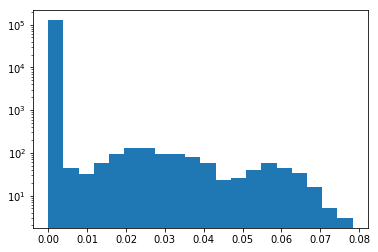

In [4]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=20)

In [6]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.005, min_support=rf.n_paths//16, signed=True)

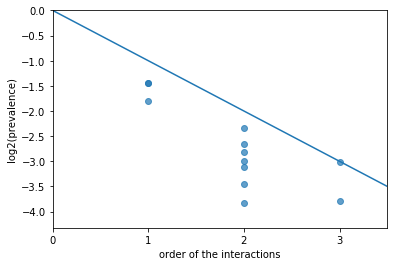

In [7]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [8]:
#visualize find out the most prevalent interactions
sorted(prevalence.items(), key=lambda x:-x[1] * 2 **len(x[0]))[:20]

[(((0, 'L'), (1, 'L'), (2, 'L')), 0.12406249999996247),
 (((0, 'L'), (2, 'L')), 0.19687499999990263),
 (((0, 'R'),), 0.36739583333309306),
 (((0, 'L'),), 0.3673958333330878),
 (((0, 'L'), (1, 'L')), 0.15833333333326802),
 (((2, 'R'),), 0.28802083333316497),
 (((0, 'L'), (1, 'R'), (2, 'L')), 0.07187499999999569),
 (((1, 'L'), (2, 'L')), 0.1423958333332817),
 (((0, 'L'), (2, 'R')), 0.1261458333333043),
 (((0, 'L'), (1, 'R')), 0.11604166666664203),
 (((1, 'R'), (2, 'L')), 0.09187499999998672),
 (((0, 'R'), (2, 'L')), 0.07072916666666383)]

- Observation: the first is the right interaction.

### simulation 2: Y = 1(X0 < 0.3, X1 < 0.5, X2 < 0.7) + 1(X3 < 0.2, X4 > 0.3)

In [9]:
#load_data generate simulation 1
n = 1000
p = 10
X = np.random.choice([0, 1], (n, p))
y_noiseless = 10 * (X[:, 0] < 0.3) * (X[:, 1] < 0.5) * (X[:, 2] < 0.7) + 10 * (X[:, 3] < 0.2) * (X[:, 4] > 0.3) 
noise = np.random.normal(0, 1, y_noiseless.shape)
SNR = 10
y = y_noiseless + (np.var(y_noiseless) / np.var(noise) * SNR**-1)**.5  * noise

In [10]:
#train_model train a random forest model
rf = rfr(bootstrap=True, n_estimators=30, max_features=8)
rf.fit(X,  y, K=1, keep_record=False)

wrf_reg(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None,
        max_features=8, max_leaf_nodes=None, max_samples=None,
        min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30,
        n_jobs=None, oob_score=False, random_state=None, verbose=0,
        warm_start=False)

- Observation: when max_features is set to be lower, the following results got worse.

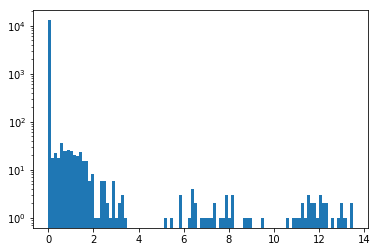

In [11]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=100)

In [12]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.01, min_support=rf.n_paths // 2 ** 6, signed=True)

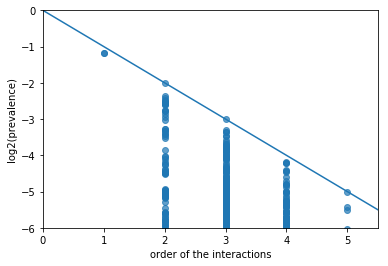

In [13]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence, ylim=(-6, 0))

In [14]:
#visualize find out the most prevalent interactions
sorted(prevalence.items(), key=lambda x:-x[1] * 2 **len(x[0]))[:20]

[(((3, 'L'), (4, 'R')), 0.24999999999999292),
 (((0, 'L'), (1, 'L'), (2, 'L')), 0.12460937499999908),
 (((0, 'L'), (1, 'L'), (2, 'L'), (3, 'L'), (4, 'R')), 0.03098958333333339),
 (((4, 'L'),), 0.438769531250008),
 (((4, 'R'),), 0.43876953125000406),
 (((0, 'L'), (1, 'L'), (2, 'L'), (4, 'L')), 0.05468750000000027),
 (((0, 'L'), (1, 'L'), (2, 'L'), (4, 'R')), 0.05429687500000046),
 (((0, 'L'), (1, 'L'), (3, 'L'), (4, 'R')), 0.05345052083333368),
 (((0, 'L'), (2, 'L'), (4, 'L')), 0.10221354166666677),
 (((1, 'L'), (3, 'L'), (4, 'R')), 0.09811197916666674),
 (((1, 'R'), (3, 'L'), (4, 'R')), 0.09811197916666643),
 (((0, 'L'), (2, 'L')), 0.19267578124999568),
 (((0, 'L'), (1, 'R'), (2, 'L'), (4, 'L')), 0.04752604166666694),
 (((3, 'R'), (4, 'R')), 0.1887695312499964),
 (((0, 'L'), (1, 'L'), (2, 'L'), (3, 'R'), (4, 'R')), 0.023307291666666712),
 (((0, 'L'), (1, 'L'), (2, 'L'), (3, 'R')), 0.04596354166666684),
 (((0, 'L'), (1, 'L'), (2, 'L'), (3, 'L')), 0.045833333333333656),
 (((0, 'L'), (4, 

- Observation: the first is the right interaction.